In [1]:
def make_dt(dt):
    dt = str(dt)

    YYYY = dt[0:4]
    MM = dt[4:6]
    DD = dt[6:8]
    HH = dt[8:10]
    mm = dt[10:12]

    return '%s-%s-%s %s:%s'%(YYYY,MM,DD,HH,mm)

In [2]:
def le2etEC(x):
    #Apply on daily total LE [W/m2]
    # from Ecological Climatology p.193
    cond = 2500.8-(2.36*x.TA)+(0.0016*(x.TA**2))+(0.00006*(x.TA**3)) #J/g latent head as a fxn of temperature
    cond *= 1000. # convert J/g -> J/kg
    #hv = 2.454*(10**6) # latent heat of vaporization
    ET = x.LE/cond # compute ET as kg/m2/s
    ET *= 86400. # number of seconds in a day
    
    return ET  # mm/m2

In [3]:
dat = rut.readRHESSysBasin('/RHESSys/jemez/out/et_cal57/et_cal57_8111_basin.daily')

In [4]:
dat.Ldown *= 1000. # KJ > Watt-Seconds
dat.Ldown /= (24.*60.*60.) # divide by seconds in a day to get W

In [5]:
dat.Lup *= 1000. # KJ > Watt-Seconds
dat.Lup /= (24.*60.*60.) # divide by seconds in a day to get W

In [6]:
datmin = dat.index.min()
datmax = dat.index.max()

In [7]:
obs = pd.read_csv('./data/AMF_US-Vcm_BASE-BADM_4-1/AMF_US-Vcm_BASE_HH_4-1.csv', skiprows=2,na_values=-9999)
obs['dt'] = obs.TIMESTAMP_END.map(make_dt)
obs.index = pd.DatetimeIndex(obs.dt)

In [8]:
obs['ET'] = obs.apply(le2etEC,axis=1)

In [9]:
obs = obs.resample('D').mean()

In [10]:
obs = obs[datmin:datmax]

In [11]:
Q = pd.read_pickle('./data/lower_lajara_specific_discharge.pcl')[datmin:datmax]

In [12]:
dat['Q_error'] = Q.discharge - dat.streamflow
dat['LW_IN_error'] = obs.LW_IN - dat.Ldown
dat['LW_OUT_error'] = obs.LW_OUT - dat.Lup
dat['ET_error'] = obs.ET - dat.ET

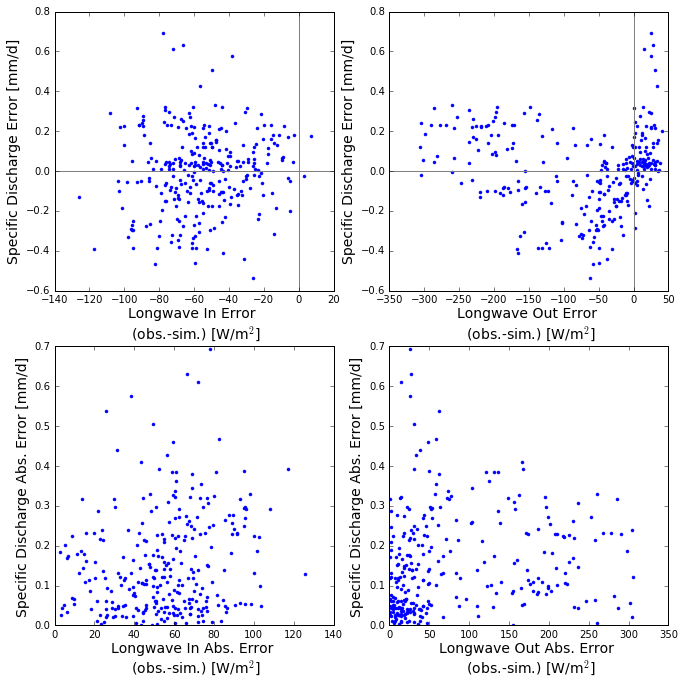

In [13]:
fig = plt.figure(figsize=(11,11))
ax1 = fig.add_subplot(221)
plt.plot(dat.LW_IN_error,dat.Q_error,'.')
plt.xlabel('Longwave In Error \n (obs.-sim.) [W/m$^2$]', fontsize=14)
plt.ylabel('Specific Discharge Error [mm/d]', fontsize=14)
plt.axhline(0,c='0.5')
plt.axvline(0,c='0.5')

ax2 = fig.add_subplot(222)
plt.plot(dat.LW_OUT_error,dat.Q_error,'.')
plt.xlabel('Longwave Out Error \n (obs.-sim.) [W/m$^2$]', fontsize=14)
plt.ylabel('Specific Discharge Error [mm/d]', fontsize=14)
plt.axhline(0,c='0.5')
plt.axvline(0,c='0.5')

ax3 = fig.add_subplot(223)
plt.plot(dat.LW_IN_error.abs(),dat.Q_error.abs(),'.')
plt.xlabel('Longwave In Abs. Error \n (obs.-sim.) [W/m$^2$]', fontsize=14)
plt.ylabel('Specific Discharge Abs. Error [mm/d]', fontsize=14)

ax4 = fig.add_subplot(224)
plt.plot(dat.LW_OUT_error.abs(),dat.Q_error.abs(),'.')
plt.xlabel('Longwave Out Abs. Error \n (obs.-sim.) [W/m$^2$]', fontsize=14)
plt.ylabel('Specific Discharge Abs. Error [mm/d]', fontsize=14)

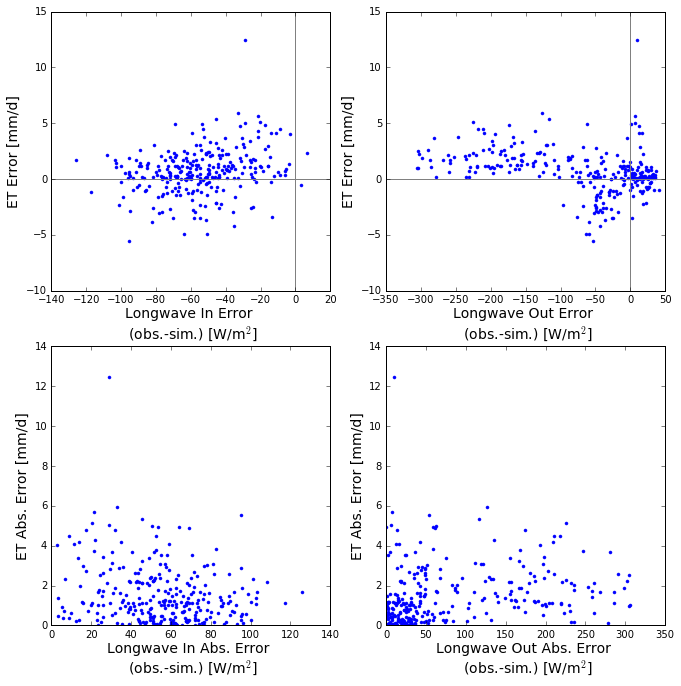

In [14]:
fig = plt.figure(figsize=(11,11))
ax1 = fig.add_subplot(221)
plt.plot(dat.LW_IN_error,dat.ET_error,'.')
plt.xlabel('Longwave In Error \n (obs.-sim.) [W/m$^2$]', fontsize=14)
plt.ylabel('ET Error [mm/d]', fontsize=14)
plt.axhline(0,c='0.5')
plt.axvline(0,c='0.5')

ax2 = fig.add_subplot(222)
plt.plot(dat.LW_OUT_error,dat.ET_error,'.')
plt.xlabel('Longwave Out Error \n (obs.-sim.) [W/m$^2$]', fontsize=14)
plt.ylabel('ET Error [mm/d]', fontsize=14)
plt.axhline(0,c='0.5')
plt.axvline(0,c='0.5')

ax3 = fig.add_subplot(223)
plt.plot(dat.LW_IN_error.abs(),dat.ET_error.abs(),'.')
plt.xlabel('Longwave In Abs. Error \n (obs.-sim.) [W/m$^2$]', fontsize=14)
plt.ylabel('ET Abs. Error [mm/d]', fontsize=14)

ax4 = fig.add_subplot(224)
plt.plot(dat.LW_OUT_error.abs(),dat.ET_error.abs(),'.')
plt.xlabel('Longwave Out Abs. Error \n (obs.-sim.) [W/m$^2$]', fontsize=14)
plt.ylabel('ET Abs. Error [mm/d]', fontsize=14)

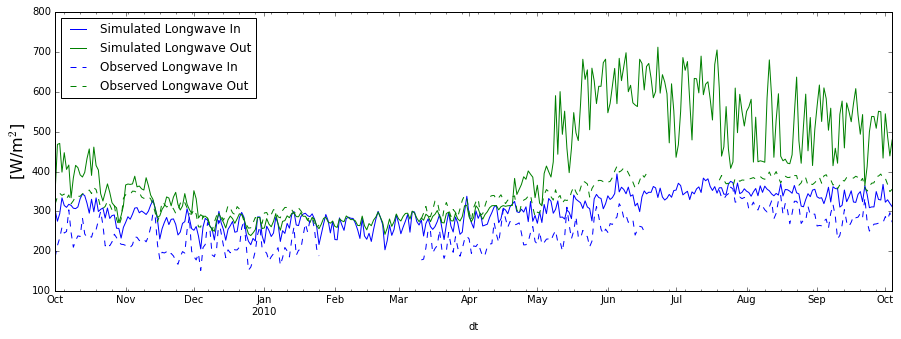

In [15]:
dat.Ldown.plot(figsize=(15,5),label='Simulated Longwave In')
dat.Lup.plot(label='Simulated Longwave Out')
obs[datmin:datmax].LW_IN.plot(c='b' ,ls = '--',label='Observed Longwave In')
obs[datmin:datmax].LW_OUT.plot(c='g' ,ls = '--',label='Observed Longwave Out')
plt.legend(loc='upper left')
plt.ylabel('[W/m$^2$]', fontsize=16)

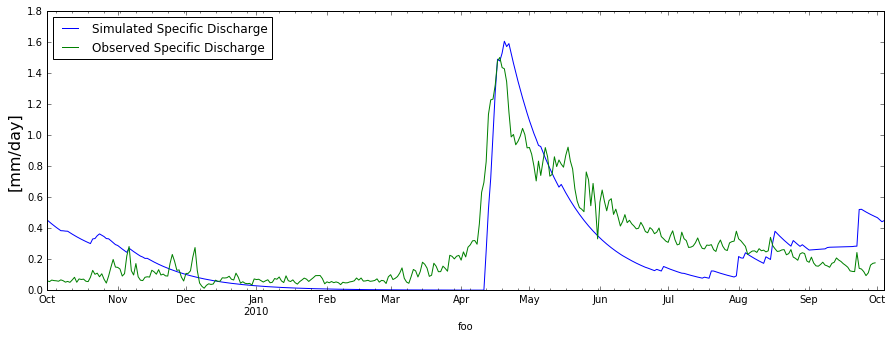

In [16]:
dat.streamflow.plot(figsize=(15,5),label='Simulated Specific Discharge')
Q.discharge.plot(label='Observed Specific Discharge')
plt.legend(loc='upper left')
plt.ylabel('[mm/day]', fontsize=16)

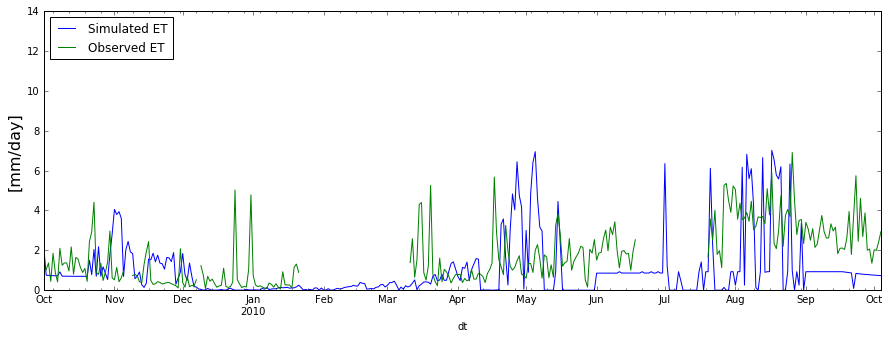

In [17]:
dat.ET.plot(figsize=(15,5),label='Simulated ET')
obs.ET.plot(label='Observed ET')
plt.legend(loc='upper left')
plt.ylabel('[mm/day]', fontsize=16)